src:
- https://www.youtube.com/watch?v=jztwpsIzEGc
- https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb

# Dependencies and Setup

In [31]:
import tensorflow as tf

In [32]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [33]:
tf.config.list_physical_devices('GPU')

[]

# Load Data

In [34]:
import numpy as np
from matplotlib import pyplot as plt

In [35]:
path = "../../Database/images"
data = tf.keras.utils.image_dataset_from_directory(path)
class_names = data.class_names

Found 2789 files belonging to 22 classes.


In [36]:
data_iterator = data.as_numpy_iterator()

In [37]:
batch = data_iterator.next()

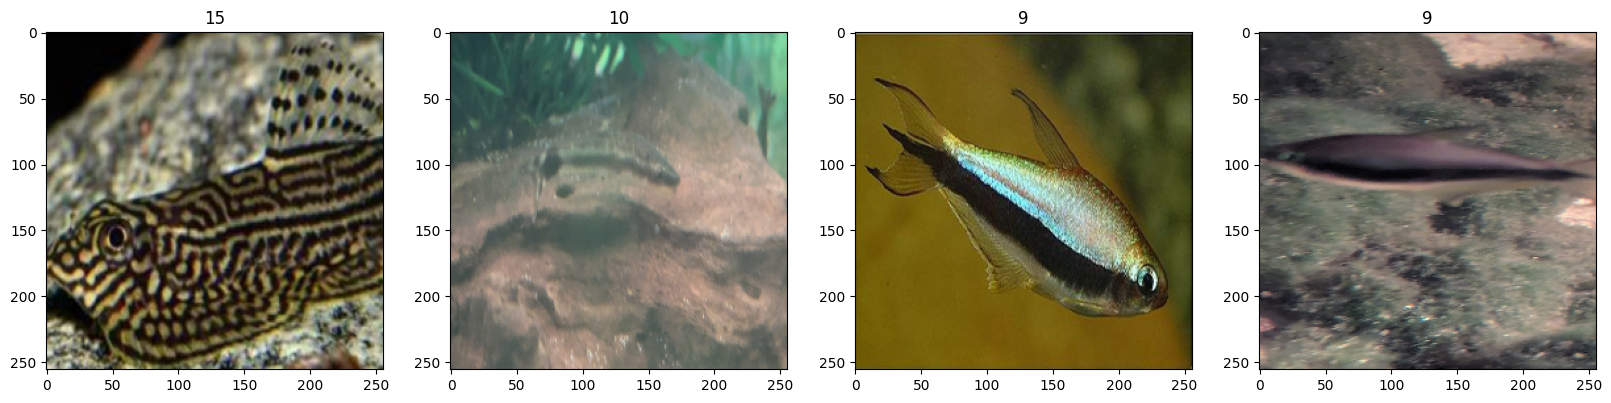

In [38]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [39]:
data = data.map(lambda x,y: (x/255, y))

In [40]:
data.as_numpy_iterator().next()

(array([[[[1.96078438e-02, 2.74509806e-02, 7.84313772e-03],
          [1.96078438e-02, 2.74509806e-02, 7.84313772e-03],
          [1.96078438e-02, 2.74509806e-02, 7.84313772e-03],
          ...,
          [3.92156886e-03, 5.09803928e-02, 1.17647061e-02],
          [3.92156886e-03, 5.09803928e-02, 1.17647061e-02],
          [0.00000000e+00, 4.70588244e-02, 7.84313772e-03]],
 
         [[1.96078438e-02, 2.74509806e-02, 7.84313772e-03],
          [1.96078438e-02, 2.74509806e-02, 7.84313772e-03],
          [1.96078438e-02, 2.74509806e-02, 7.84313772e-03],
          ...,
          [3.92156886e-03, 5.09803928e-02, 1.17647061e-02],
          [3.92156886e-03, 5.09803928e-02, 1.17647061e-02],
          [0.00000000e+00, 4.70588244e-02, 7.84313772e-03]],
 
         [[1.96078438e-02, 2.74509806e-02, 7.84313772e-03],
          [1.96078438e-02, 2.74509806e-02, 7.84313772e-03],
          [1.96078438e-02, 2.74509806e-02, 7.84313772e-03],
          ...,
          [3.92156886e-03, 5.09803928e-02, 1.1764

# Split Data

In [41]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [42]:
train_size

61

In [43]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Extract images and labels

In [44]:
train_images = []
train_labels = []

In [45]:
for images, labels in train:
    train_images.append(images.numpy())  # Append image batch
    train_labels.append(labels.numpy())  # Append label batch

In [46]:
# Convert lists to numpy arrays
train_images = np.concatenate(train_images, axis=0)  # Concatenate all batches along the first axis (samples)
train_labels = np.concatenate(train_labels, axis=0)

In [47]:
val_images = []
val_labels = []

In [48]:
for images, labels in val:
    val_images.append(images.numpy())  # Append image batch
    val_labels.append(labels.numpy())  # Append label batch

print("val_labels before concatenation:", val_labels)

val_labels before concatenation: [array([13,  9,  4,  6, 10, 20, 15, 18,  9, 15,  9,  3, 12, 10,  5, 19,  7,
       15, 15, 19,  2, 19, 21,  3, 15, 15, 15,  2, 14, 17,  1, 12],
      dtype=int32), array([20,  4,  9, 16,  9, 13, 19,  5, 17,  6, 19, 15,  4,  9, 15,  7, 10,
        6, 20,  9, 19,  2,  3, 15, 19,  9, 10, 10,  2,  9,  1, 19],
      dtype=int32), array([20, 16,  7,  9,  3,  9,  1, 10, 17, 21, 10, 11, 14, 16, 20,  6,  9,
       16,  6, 18,  5,  7,  3, 15, 10, 13,  6, 14,  3,  1, 15, 15],
      dtype=int32), array([ 9,  5, 13,  6, 16, 21,  7,  5,  1,  9,  9, 10, 15, 18, 12, 12, 10,
       19, 20, 18, 11,  9,  2, 21, 10,  8, 10,  6,  2, 10,  4,  7],
      dtype=int32), array([ 7, 12, 10, 14, 19, 13, 10,  5,  7,  1,  1,  7, 17, 13,  1, 12, 10,
       15,  0,  3, 10, 13, 11, 16, 19, 10, 11, 15,  7,  5,  4,  9],
      dtype=int32), array([ 4, 13,  3,  9, 11,  7, 14,  1,  4, 15,  5, 13,  9,  2, 16,  7,  3,
        7, 15,  6,  9, 16, 16, 12,  1,  7,  5, 10,  9, 16, 13,  1],
      dt

2025-03-13 20:39:21.296539: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [49]:
# Convert lists to numpy arrays
val_images = np.concatenate(val_images, axis=0)  # Concatenate all batches along the first axis (samples)
val_labels = np.concatenate(val_labels, axis=0)

# Build Deep Learning Model

In [50]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [52]:
model = Sequential()

In [53]:
# First convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Second convolutional layer
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Third convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))

# Output layer for 22 classes
model.add(Dense(22, activation='softmax'))

In [54]:
from tensorflow.keras.utils import to_categorical

In [55]:
# One-hot encode the labels
# One-hot encode the labels
train_labels_one_hot = to_categorical(train_labels, num_classes=22)
val_labels_one_hot = to_categorical(val_labels, num_classes=22)

# Check shapes of the data
print("train_images shape:", train_images.shape)  # (num_train_samples, height, width, channels)
print("train_labels_one_hot shape:", train_labels_one_hot.shape)  # (num_train_samples, 22)
print("val_images shape:", val_images.shape)  # (num_val_samples, height, width, channels)
print("val_labels_one_hot shape:", val_labels_one_hot.shape)  # (num_val_samples, 22)

train_images shape: (1952, 256, 256, 3)
train_labels_one_hot shape: (1952, 22)
val_images shape: (544, 256, 256, 3)
val_labels_one_hot shape: (544, 22)


In [56]:
# Compile the model with categorical crossentropy
model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 22)             │         5,654 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,702,022 (14.12 MB)

 Trainable params: 3,702,022 (14.12 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [58]:
logdir='logs'

In [59]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [60]:
hist = model.fit(train_images, train_labels_one_hot, epochs=5,
                 validation_data=(val_images, val_labels_one_hot),
                 callbacks=[tensorboard_callback])


Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 25s 389ms/step - accuracy: 0.0780 - loss: 3.0335 - val_accuracy: 0.1875 - val_loss: 2.7723
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 385ms/step - accuracy: 0.2324 - loss: 2.5481 - val_accuracy: 0.3456 - val_loss: 2.2921
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 383ms/step - accuracy: 0.3766 - loss: 2.0130 - val_accuracy: 0.4320 - val_loss: 1.9490
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 384ms/step - accuracy: 0.6003 - loss: 1.3433 - val_accuracy: 0.5239 - val_loss: 1.7869
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 383ms/step - accuracy: 0.7975 - loss: 0.6760 - val_accuracy: 0.5901 - val_loss: 1.8197


# Plot Performance

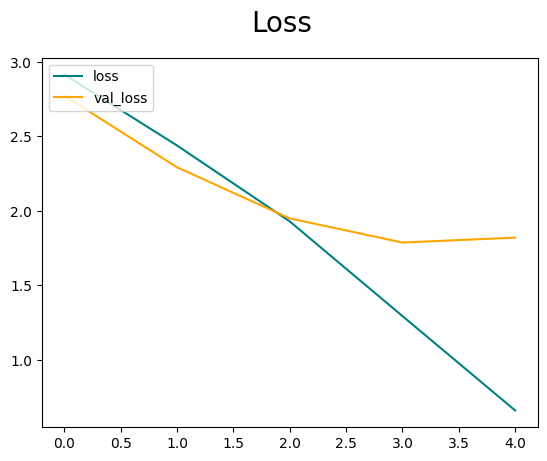

In [61]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

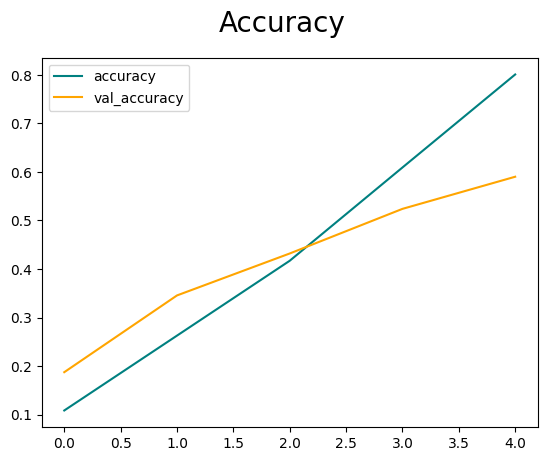

In [62]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [63]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [64]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [65]:
# Iterate over test dataset
for batch in test.as_numpy_iterator():
    X, y = batch

    # Ensure `y` is one-hot encoded
    y_one_hot = to_categorical(y, num_classes=22)  # Convert labels to one-hot

    # Get model predictions
    yhat = model.predict(X)

    # Update metrics
    pre.update_state(y_one_hot, yhat)  # Use one-hot encoded labels
    re.update_state(y_one_hot, yhat)   # Use one-hot encoded labels
    acc.update_state(y_one_hot, yhat)  # Use one-hot encoded labels

# Print final metric values
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Precision: 0.6397849321365356
Recall: 0.46484375
Accuracy: 0.515625


# Test

In [66]:
import cv2

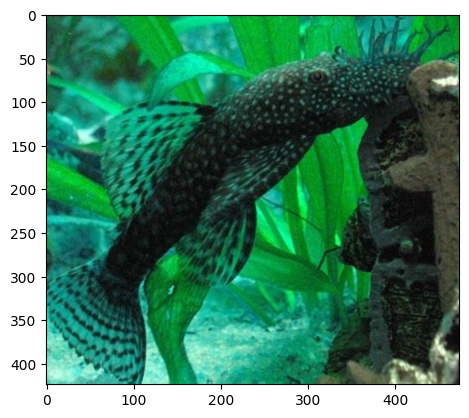

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted class is(Ancistrus_dolichopterus): Crossocheilus_reticulatus


In [67]:
img = cv2.imread('test_pictures/Ancistrus_dolichopterus.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Ancistrus_dolichopterus): {class_names[predicted_class]}')

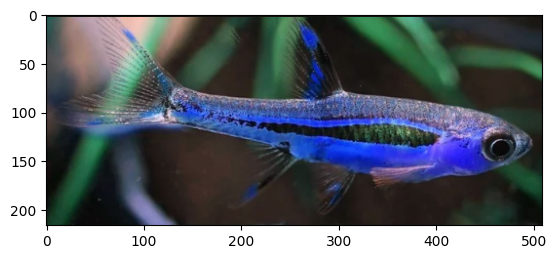

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class is(Boraras_brigittae): Inpaichthys_kerri


In [68]:
img = cv2.imread('test_pictures/Boraras_brigittae.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Boraras_brigittae): {class_names[predicted_class]}')

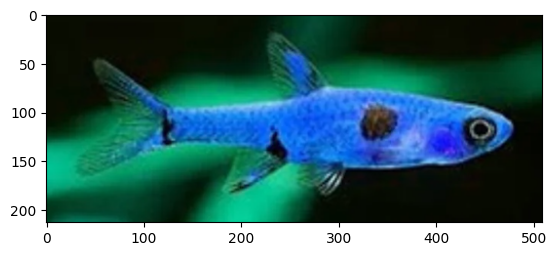

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class is(Boraras_maculatus): Inpaichthys_kerri


In [69]:
img = cv2.imread('test_pictures/Boraras_maculatus.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Boraras_maculatus): {class_names[predicted_class]}')

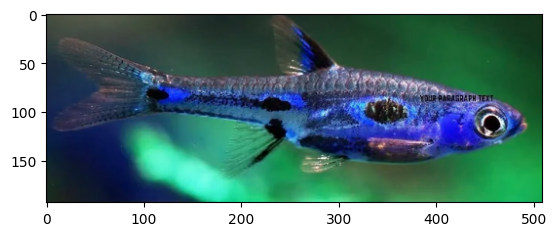

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class is(Boraras_merah): Inpaichthys_kerri


In [70]:
img = cv2.imread('test_pictures/Boraras_merah.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Boraras_merah): {class_names[predicted_class]}')

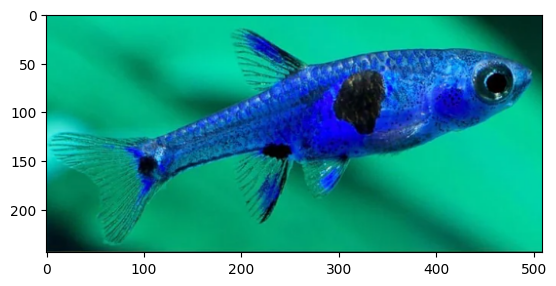

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class is(Boraras_naevus): Nematobrycon_palmeri


In [71]:
img = cv2.imread('test_pictures/Boraras_naevus.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Boraras_naevus): {class_names[predicted_class]}')

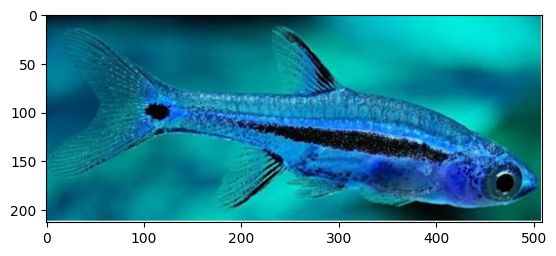

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class is(Boraras_urophtalmoides): Nematobrycon_palmeri


In [72]:
img = cv2.imread('test_pictures/Boraras_urophtalmoides.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Boraras_urophtalmoides): {class_names[predicted_class]}')

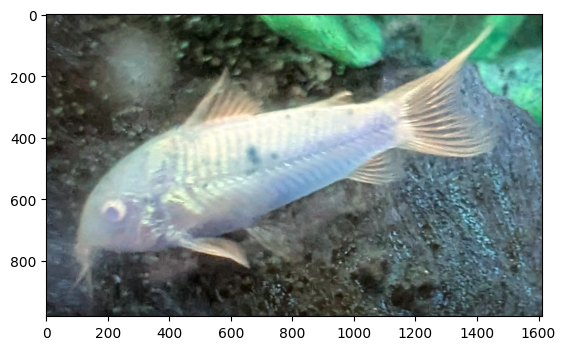

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class is(Corydoras_paleatus): Trichogaster_trichopterus


In [73]:
img = cv2.imread('test_pictures/Corydoras_paleatus.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Corydoras_paleatus): {class_names[predicted_class]}')

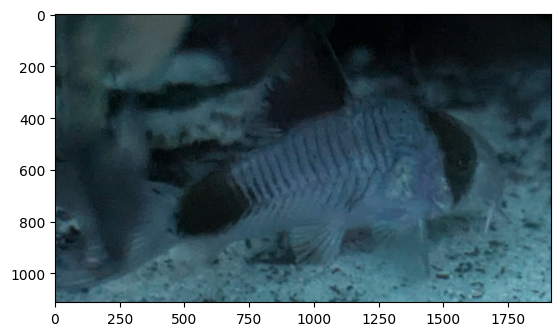

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class is(Corydoras_Panda): Crossocheilus_reticulatus


In [74]:
img = cv2.imread('test_pictures/Corydoras_Panda.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Corydoras_Panda): {class_names[predicted_class]}')

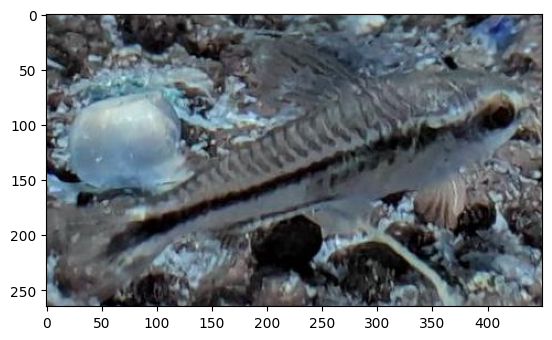

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class is(Corydoras_pygmaeus): Crossocheilus_reticulatus


In [75]:
img = cv2.imread('test_pictures/Corydoras_pygmaeus.jpeg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Corydoras_pygmaeus): {class_names[predicted_class]}')

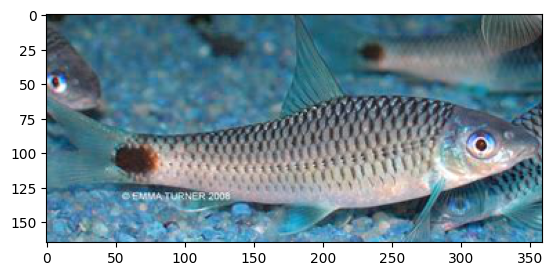

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class is(Crossocheilus_reticulatus): Crossocheilus_reticulatus


In [76]:
img = cv2.imread('test_pictures/Crossocheilus_reticulatus.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Crossocheilus_reticulatus): {class_names[predicted_class]}')

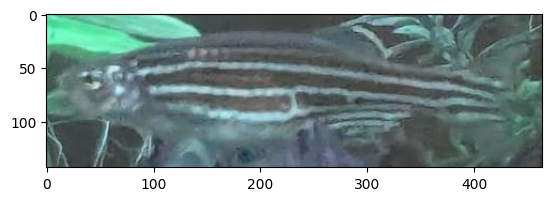

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class is(Danio_rerio): Danio_rerio


In [77]:
img = cv2.imread('test_pictures/Danio_rerio.jpeg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Danio_rerio): {class_names[predicted_class]}')

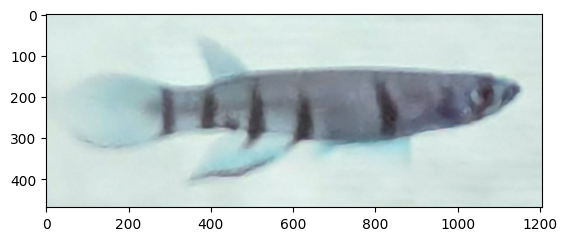

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class is(Epiplatys_dageti): Crossocheilus_reticulatus


In [78]:
img = cv2.imread('test_pictures/Epiplatys_dageti.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Epiplatys_dageti): {class_names[predicted_class]}')

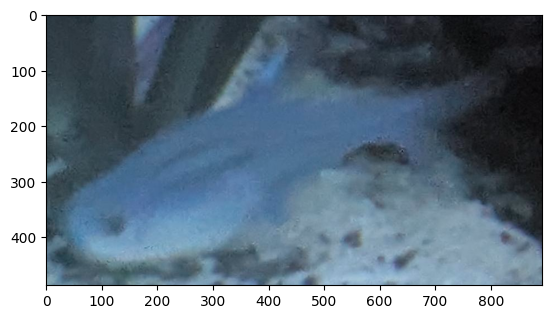

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class is(Hyphessobrycon_amandae): Crossocheilus_reticulatus


In [79]:
img = cv2.imread('test_pictures/Hyphessobrycon_amandae.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Hyphessobrycon_amandae): {class_names[predicted_class]}')

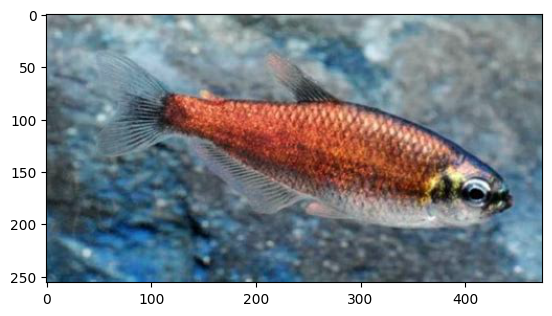

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class is(Inpaichthys_kerri): boraras_brigittae


In [80]:
img = cv2.imread('test_pictures/Inpaichthys_kerri.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Inpaichthys_kerri): {class_names[predicted_class]}')

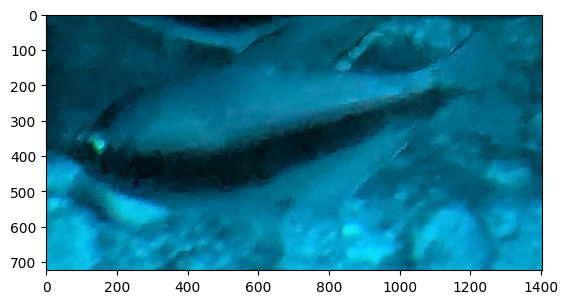

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class is(Nematobrycon_palmeri): Corydoras_paleatus


In [81]:
img = cv2.imread('test_pictures/Nematobrycon_palmeri.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Nematobrycon_palmeri): {class_names[predicted_class]}')

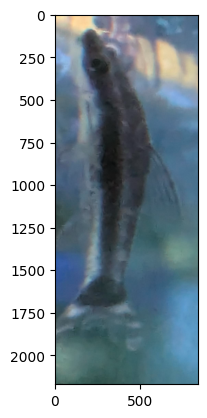

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class is(Otocinclus_affinis): Crossocheilus_reticulatus


In [82]:
img = cv2.imread('test_pictures/Otocinclus_affinis.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Otocinclus_affinis): {class_names[predicted_class]}')

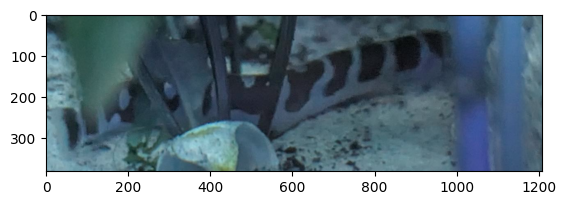

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class is(Pangio_kuhlii): Danio_rerio


In [83]:
img = cv2.imread('test_pictures/Pangio_kuhlii.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Pangio_kuhlii): {class_names[predicted_class]}')

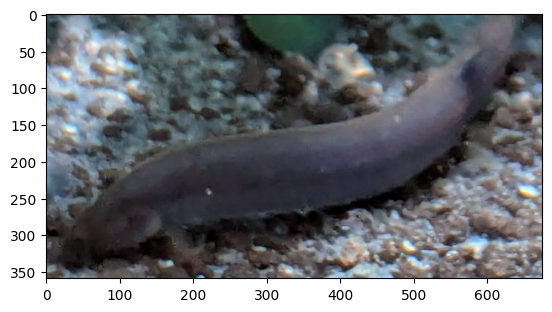

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class is(Pangio_pangia): Pangio_pangia


In [84]:
img = cv2.imread('test_pictures/Pangio_pangia.jpeg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Pangio_pangia): {class_names[predicted_class]}')

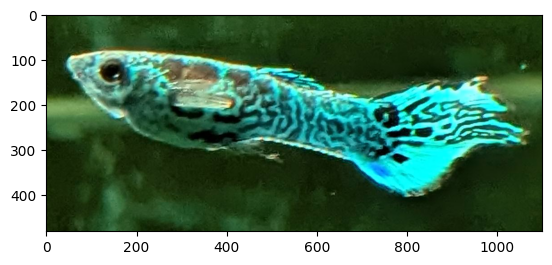

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class is(Poecilia_wingei): Danio_rerio


In [85]:
img = cv2.imread('test_pictures/Poecilia_wingei.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Poecilia_wingei): {class_names[predicted_class]}')

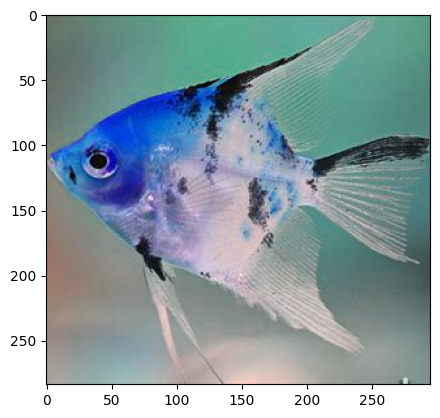

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class is(Pterophyllum_scalare): Danio_rerio


In [86]:
img = cv2.imread('test_pictures/Pterophyllum_scalare.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Pterophyllum_scalare): {class_names[predicted_class]}')

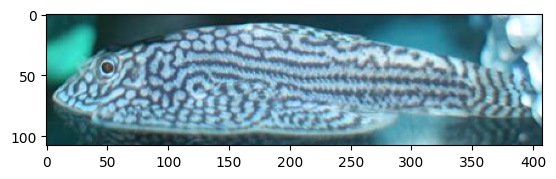

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class is(Sewellia_lineolata): Sewellia_lineolata


In [87]:
img = cv2.imread('test_pictures/Sewellia_lineolata.png')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Sewellia_lineolata): {class_names[predicted_class]}')

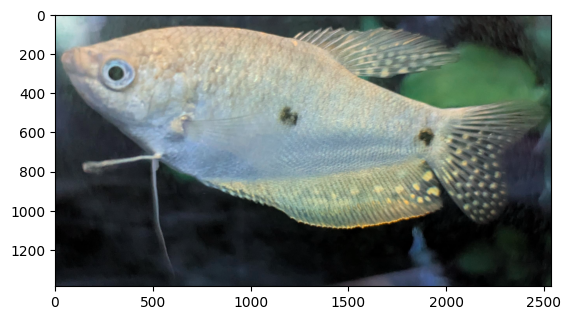

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class is(Trichogaster_trichopterus): Trichogaster_trichopterus


In [88]:
img = cv2.imread('test_pictures/Trichogaster_trichopterus.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Trichogaster_trichopterus): {class_names[predicted_class]}')